# <center> Modelagem Estatistica Regressão Linear </center>

## Basic ToolBox - Modelagem Estatistica Regressão Linear  III

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import scipy.stats
import scipy
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# <center> Modelagem Estatistica </center>

### Carregando Dados para Exemplificação 

In [17]:
df_diamonds = pd.read_csv('diamonds.csv')
df_diamonds = df_diamonds.drop(columns=['Unnamed: 0'])
display(df_diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
# Visualizando parte do DataSet
df_diamonds[['price', 'carat', 'cut']].head()

,price,carat,cut
0,326,0.23,Ideal
1,326,0.21,Premium
2,327,0.23,Good
3,334,0.29,Premium
4,335,0.31,Good


In [19]:
# Utilizando para analise parte das variaveis no DataSet
df_diamonds_subset = df_diamonds.loc[:,['price', 'carat', 'cut']]
df_diamonds_subset.head()

,price,carat,cut
0,326,0.23,Ideal
1,326,0.21,Premium
2,327,0.23,Good
3,334,0.29,Premium
4,335,0.31,Good


## ``Variáveis Dummy`` em Regressão Linear

Uma ``variável dummy``, por sua vez, uma variavel qualitativa,  é aquela que assume os **valores 0 ou 1** para indicar a **ausência** ou a **presença** de algum **efeito categórico** que pode **mudar o resultado**. Essas ``variáveis dummy`` ( **Variaveis Qualitativas Categoricas** ) são usadas como dispositivos para **classificar dados em categorias** mutuamente exclusivas.

A **regressão linear** só aceita **medidas proporcionais** e **medidas intervalares**, ou seja, na prática temos que tentar enxergar as **variaveis qualitativas** desta forma, e para issso, o caminho é criar ``Variaveis Dummy``
<br>
</br>

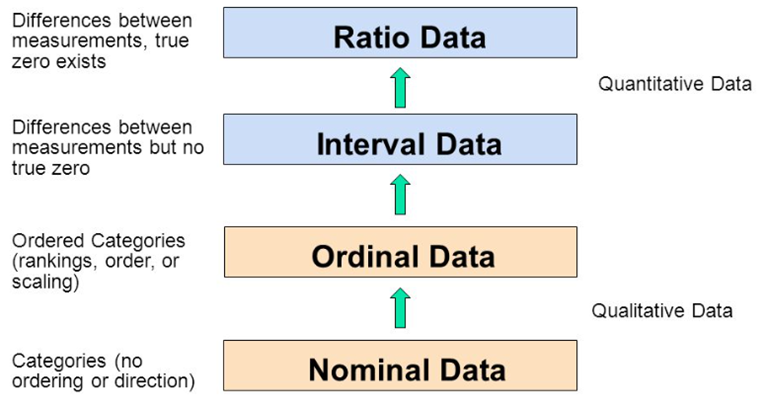
<br>
</br>

## Exemplo: <center> ``Variavel Qualitativa`` Transformada em ``Variavel Dummy - Categorica`` </center>

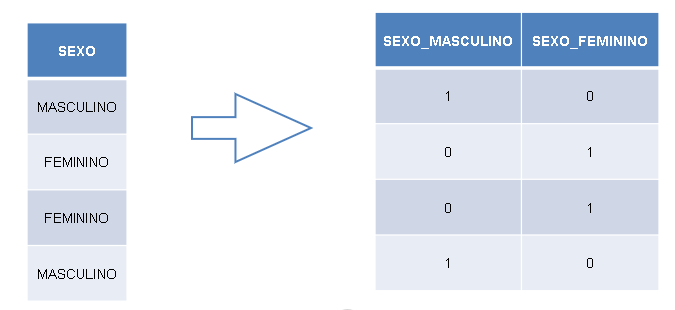

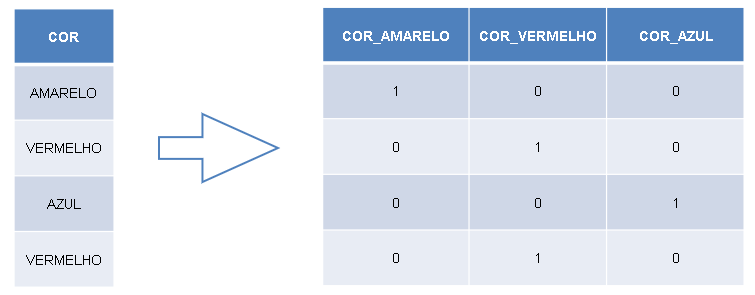

In [20]:
# Aplicando a função "get_dummies" em apenas uma variavel qualitativa categorica
df_diamonds_subset = pd.get_dummies(
    
    df_diamonds_subset,  # Dados
    drop_first=True, # Drop Column "Fair"
    dtype=int) # Transformada em "Valores inteiros"

df_diamonds_subset

,price,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,326,0.23,0,1,0,0
1,326,0.21,0,0,1,0
2,327,0.23,1,0,0,0
3,334,0.29,0,0,1,0
4,335,0.31,1,0,0,0
...,...,...,...,...,...,...
53935,2757,0.72,0,1,0,0
53936,2757,0.72,1,0,0,0
53937,2757,0.70,0,0,0,1
53938,2757,0.86,0,0,1,0


In [21]:
# Indeependentes ( Preditoras )
X = df_diamonds_subset.drop(['price'], axis=1)

# Dependente ( Target )
Y = df_diamonds_subset['price']

In [22]:
# Adicionando B-zero
X = sm.add_constant(X)

In [23]:
# Gerando os betas
modelo_linear_multiplo = sm.OLS(Y,X)

# Ajustando a reta
modelo_linear_multiplo = modelo_linear_multiplo.fit()

In [24]:
# Tabela de Resumos
display(modelo_linear_multiplo.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:34:20   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3875.4697     40.408    -95.908      0.000   -3954.670   -3796.269
carat          7871.0821     13.980    563.040      0.000    7843.682    7898.482
cut_Good       1120.3319     43.499     25.755      0.000    1035.073    1205.591
cut_Ideal      1800.9240     39.344     45.773      0.000    1723.809    1878.039
cut_Premium    1439.0771     39.865     36.098      0.000    1360.941    1517.214
cut_Very Good  1510.1354     40.240     37.528      0.000    1431.265    1589.006
==============================================================================
Omnibus:                    14616.138   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150962.278
Skew:                           1.007   Prob(JB):                         0.00
Kurtosis:                      10.944   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ``Treino`` e ``Teste``

Umas das etapas iniciais no desenvolvimento de um modelo estatistico de regressão, ou outro modelo, é **separar** uma **parte dos dados** para **treinar o modelo** e outra **parte** para **aferir a qualidade das previsões**. Assim teremos mais segurança de que o modelo realmente aprendeu 

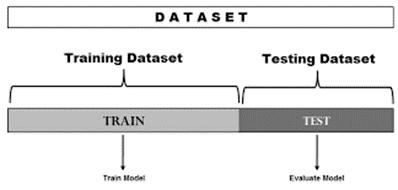

Para dividir nossos dados em ``Treino`` e ``Teste``, usaremos a função **train_test_split** do sklearn. Passamos o parâmetro random_state = 123 para reprodutibilidade e o parâmetro train_size para indicar quantos % da base serão destinados para treinamento.

### sklearn.model_selection.``train_test_split``

* Divida matrizes ou matrizes em subconjuntos aleatórios de treinamento e teste.

In [25]:
# Dividindo o DataSet em 70% dos dados para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    
    X, # Variaveis Independetes
    Y, # variavel Dependente
    train_size=0.7, # 70% dos dados para treino
    random_state=123) # Controla o embaralhamento aplicado aos dados antes de aplicar a divisão

## Subajuste ( ``Underfitting`` )

O ``underfitting`` ocorre quando o **modelo** de aprendizado de máquina **não consegue se ajustar** adequadamente aos **dados de treinamento**, resultando em um desempenho insatisfatório na **fase de teste**. Existem diversas causas para o ``underfitting``. Algumas das principais causas do underfitting são: **Falta de complexidade do modelo**, **Dados insuficientes**, **Ruído nos dados**, e quando isso ocorre, se diz que o modelo possui **alto viés**.

O ``subajuste`` ( **Underfitting**) é um cenário em ciência de dados no qual um modelo é **incapaz de capturar o relacionamento** entre as **variáveis de entrada** e **saída** com precisão, gerando uma **alta taxa de erro** tanto no **conjunto de treinamento** quanto nos **dados não exibidos**. 

Ele ocorre quando um **modelo é muito simples**, o que pode ser o resultado de um **modelo que necessita** de mais tempo de **treinamento, mais recursos de entrada ( Inserie Variaveis ), ou menos regularização**.

Se um **modelo não fizer uma generalização adequada** para **novos dados**, não poderá ser utilizado para tarefas de **classificação** ou **previsão**. É devido à **generalização de um modelo**, para **novos dados**, que é possível usar algoritmos de machine learning todos os dias, para fazer **previsões** e **classificar dados**.

Uma **propensão alta** e uma **variância baixa** são **indicadores plausíveis** de ``subajuste``.  Podemos observar ``underfitting``, **comparando as métricas de treino e teste**: As duas estarão **muito baixas** (**R2**) ou **muito altas** (**MSE**, **MAE**, **MAPE**)

### Como evitar o ``underfitting`` no aprendizado de máquina
<br>


**Aumentar a complexidade do modelo:**

A escolha de um modelo mais complexo, ajustar e melhorar os hiperparametros do modelo para melhorar a performance no treinamento, Realizar ensemble learning.



**Tamanho do conjunto de dados de treinamento:**

Aumentar o tamanho da amostra, obter mais dados ou gerar dados sintéticos, pois, poucos dados podem não capturar o comportamento correto dos dados.

## Sobreajuste ( ``Overfitting`` )

Quando o **modelo se ajusta perfeitamente aos dados de treinamento** há um **indício forte** de que ele tenha **aprendido o padrão** do **erro/ruído**. Como isso não faz parte do fenômeno, é algo não desejado.

O ``sobreajuste`` ocorre quando o **modelo não pode generalizar**, e em vez disso, se adéqua muito estritamente ao conjunto de dados** de **treinamento**.

Nesse cenário de ``sobreajuste``, quando **testamos o modelo**, provavelmente teremos um **erro bem maior** que no **treinamento**. Isso é conhecido como ``Overfitting``. Pode ser notado quando temos um **Erro muito baixo no treinamento**, mas um **erro muito alto na fase de teste**.  Pode se pode se reduzir esse efeito inserindo menos variaveis no modelo, também pode se reduzir os ruidos nos dados( **PCA**, **Autoencoder** )

Um modelo, com problemas de ``overfitting``, geralmente **possui mais parametros**, mais ``Betas``, e é muito **sensivel aos dados de treinamento**. Essa **caracteristica de sensibilidade**, chamamos de ``variancia``. Portanto, um modelo mais flexivel que se ajusta mais aos dados de treino, é conhecido por ter **alta variancia**.


### Como evitar ``overfitting`` em machine learning
<br>


**Divida seus dados adequadamente:**

Um dos primeiros passos para evitar o overfitting é dividir seus dados em conjuntos de treinamento, validação e teste. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de validação é usado para ajustar os hiperparâmetros do modelo. Por fim, o conjunto de teste é usado para avaliar o desempenho final do modelo. É importante garantir que os dados em cada conjunto sejam representativos e não haja sobreposição entre eles.

**Aplique técnicas de regularização:**

A regularização é uma técnica útil para lidar com o overfitting. Ela adiciona uma penalidade ao custo do modelo com base nos coeficientes dos parâmetros. Isso ajuda a evitar que os coeficientes se tornem muito grandes e, assim, reduz o overfitting. Existem diferentes métodos de regularização, como a regularização L1 (Lasso) e a regularização L2 (Ridge). Experimente diferentes técnicas e escolha a que melhor se adequa ao seu conjunto de dados e modelo.

**Utilize validação cruzada:**

A validação cruzada é uma técnica que envolve dividir o conjunto de treinamento em várias partes menores, chamadas de folds. Em seguida, realiza-se o treinamento e validação do modelo em combinações diferentes desses folds. Isso ajuda a obter uma estimativa mais confiável do desempenho do modelo e reduz o viés associado a uma única divisão do conjunto de treinamento.

Há um **trade-off** (Troca )  entre ``viés`` e ``variância``. Quanto mais **aumentamos a variância** de um modelo, mais **diminuímos seu viés** e vice-versa. 

Porém, há um meio termo, um **ponto de equilíbrio**, em que nem o ``viés`` ( Bias ) nem a`` variância`` são **tão altos**. Nesse ponto, o **erro é o mínimo** possível. É esse **ponto que devemos buscar quando construímos um modelo**.

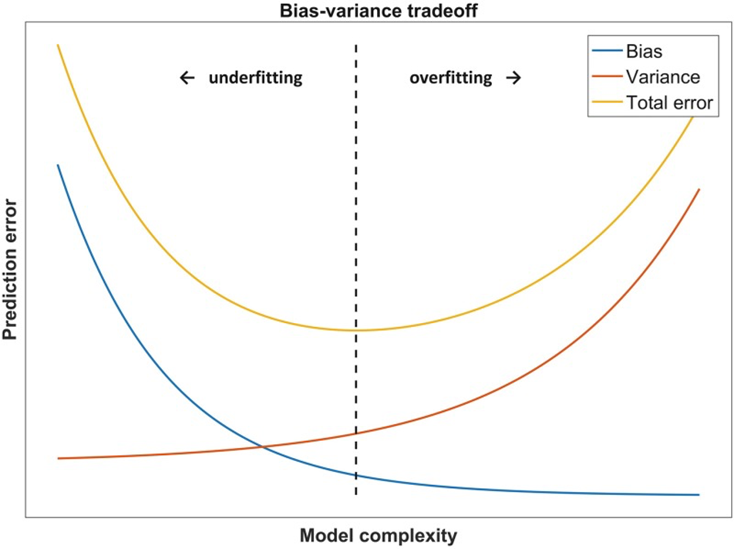

<br>
</br>
<br>
</br>

